In [1]:
# CREATING THE WEBSCRAPPER

from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [4]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-featur

In [6]:
soup.find_all('table')[1]

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [13]:
soup.find('table', class_ = 'wikitable sortable')

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [14]:
table = soup.find_all('table')[1]

In [15]:
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [27]:
titles = table.find_all('th')

In [28]:
titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [29]:
table_titles = [ title.text.strip() for title in titles]

print(table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [30]:
import pandas as pd

In [31]:
df = pd.DataFrame(columns = table_titles)

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [33]:
column_data = table.find_all('tr')

In [43]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    
    length = len(df)
    df.loc[length] = individual_row_data

In [44]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [48]:
df.to_csv(r'C:\Users\rithi\OneDrive\Documents\FORE\List_of_largest_companies_in_the_United_States_by_revenue_Data.csv', index = False)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data = pd.read_csv('List_of_largest_companies_in_the_United_States_by_revenue_Data.csv')
data

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"6,11,289",6.70%,"21,00,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"5,13,983",9.40%,"15,40,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"4,13,680",44.80%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"3,94,328",7.80%,"1,64,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"3,24,162",12.70%,"4,00,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.60%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.50%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.50%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.50%,"1,30,000","Waltham, Massachusetts"


In [18]:
import pandas as pd

# Loading the dataset
data = pd.read_csv('List_of_largest_companies_in_the_United_States_by_revenue_Data.csv') 

# Removing commas and converting to numeric
data['Revenue (USD millions)'] = data['Revenue (USD millions)'].str.replace(',', '').astype(float)

# Calculating the mean of the revenue column
revenue_mean = data['Revenue (USD millions)'].mean()

# Printing the mean
print(f"Mean Revenue: {revenue_mean:.2f} USD millions")


Mean Revenue: 117566.46 USD millions


In [19]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)

             Rank  Revenue (USD millions)
count  100.000000              100.000000
mean    50.500000           117566.460000
std     29.011492           100915.112163
min      1.000000            44200.000000
25%     25.750000            57876.000000
50%     50.500000            80824.500000
75%     75.250000           138763.000000
max    100.000000           611289.000000


In [63]:
import pandas as pd

# Load your dataset
data = pd.read_csv('List_of_largest_companies_in_the_United_States_by_revenue_Data.csv')

# Remove commas and convert the column to numeric
data['Revenue (USD millions)'] = data['Revenue (USD millions)'].str.replace(',', '').astype(float)

# Calculate the median of the 'Revenue (USD millions)' column
median_revenue = data['Revenue (USD millions)'].median()

# Print the median
print(f"Median Revenue: {median_revenue:.2f} USD millions")


Median Revenue: 80824.50 USD millions


In [64]:
import pandas as pd

# Load your dataset
data = pd.read_csv('List_of_largest_companies_in_the_United_States_by_revenue_Data.csv')

# Remove commas and convert the 'Revenue (USD millions)' column to numeric
data['Revenue (USD millions)'] = data['Revenue (USD millions)'].str.replace(',', '').astype(float)

# Calculate the variance of the 'Revenue (USD millions)' column
revenue_variance = data['Revenue (USD millions)'].var()

# Print the variance
print(f"Variance of Revenue: {revenue_variance:.2f} USD millions^2")


Variance of Revenue: 10183859862.96 USD millions^2


In [66]:
import pandas as pd

# Load your dataset
data = pd.read_csv('List_of_largest_companies_in_the_United_States_by_revenue_Data.csv')

# Remove commas and convert the 'Revenue (USD millions)' column to numeric
data['Revenue (USD millions)'] = data['Revenue (USD millions)'].str.replace(',', '').astype(float)

# Calculate the standard deviation of the 'Revenue (USD millions)' column
revenue_std_dev = data['Revenue (USD millions)'].std()

# Print the standard deviation
print(f"Standard Deviation of Revenue: {revenue_std_dev:.2f} USD millions")


Standard Deviation of Revenue: 100915.11 USD millions


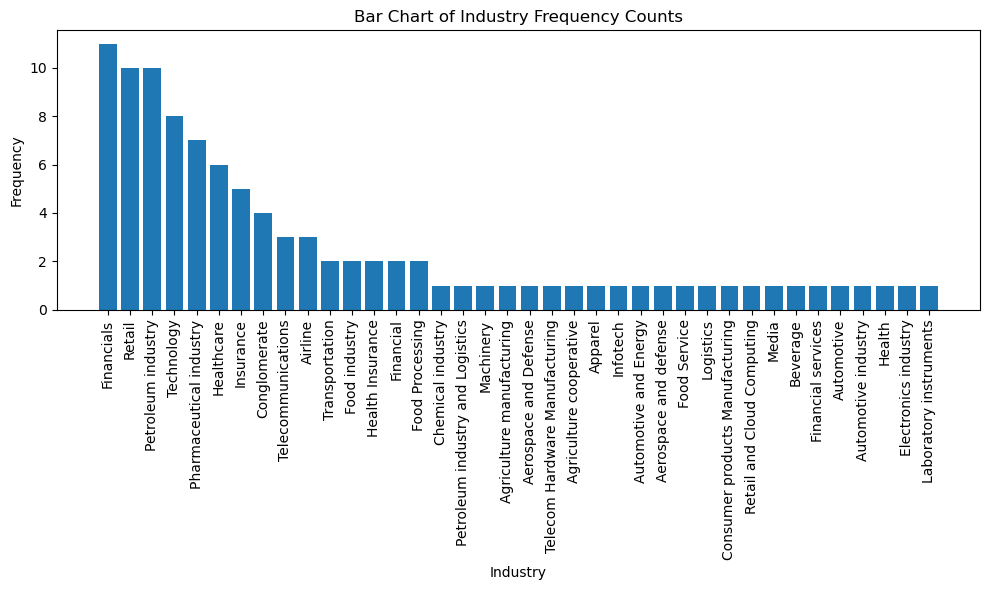

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('List_of_largest_companies_in_the_United_States_by_revenue_Data.csv')

# Frequency counts for the 'Industry' categorical column
industry_counts = data['Industry'].value_counts()

# Create a bar chart for the frequency counts
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.bar(industry_counts.index, industry_counts)
plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.title('Bar Chart of Industry Frequency Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability (optional)
plt.tight_layout()  # Optional: Adjust spacing for labels
plt.show()

<Axes: >

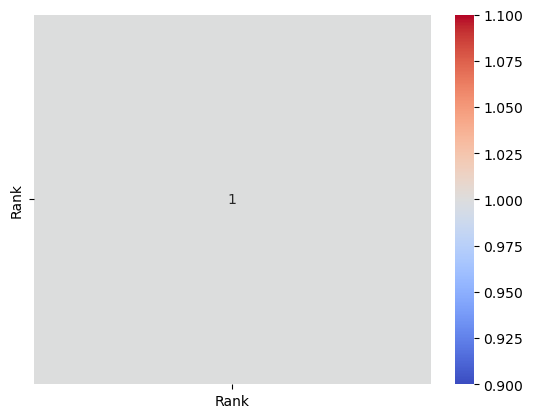

In [28]:
import seaborn as sns
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


<Axes: xlabel='Industry', ylabel='Revenue (USD millions)'>

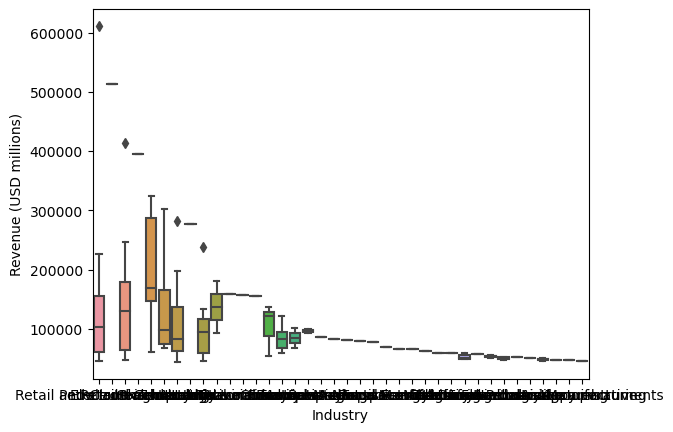

In [39]:
import seaborn as sns
# Convert the 'Revenue (USD millions)' column to numeric
data['Revenue (USD millions)'] = pd.to_numeric(data['Revenue (USD millions)'], errors='coerce')
# Create the boxplot
sns.boxplot(x='Industry', y='Revenue (USD millions)', data=data)


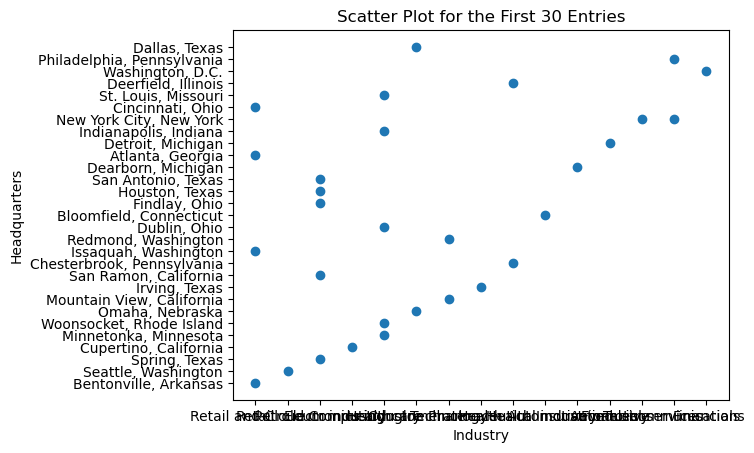

Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth',
       'Employees', 'Headquarters'],
      dtype='object')


In [53]:
import matplotlib.pyplot as plt

# Select the first 30 entries in your dataset
subset_data = data.head(30)

# Scatter Plot
plt.scatter(subset_data['Industry'], subset_data['Headquarters'])
plt.xlabel('Industry')
plt.ylabel('Headquarters')

plt.title('Scatter Plot for the First 30 Entries')
plt.show()
print(data.columns)

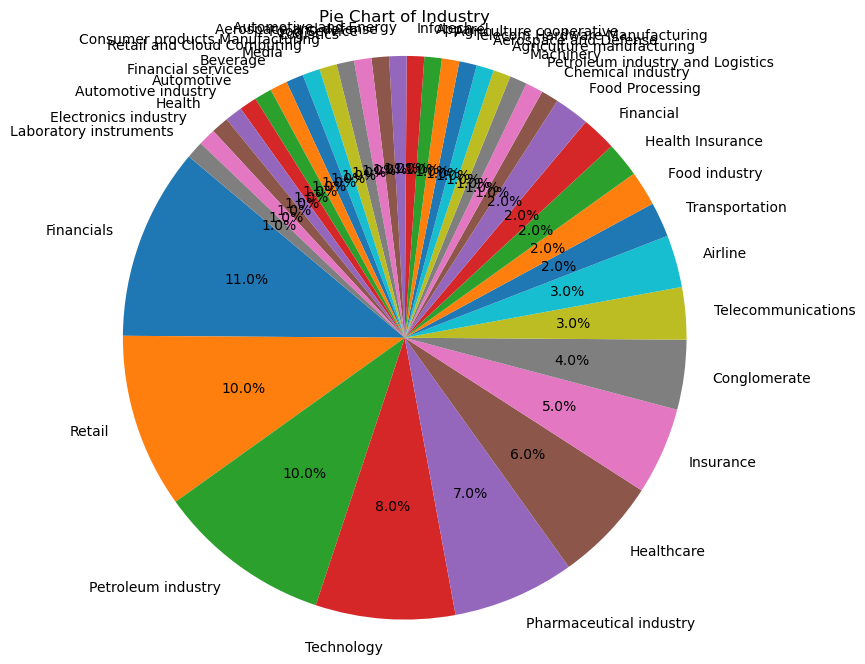

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('List_of_largest_companies_in_the_United_States_by_revenue_Data.csv')

# Calculate category counts
category_counts = data['Industry'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Industry')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()


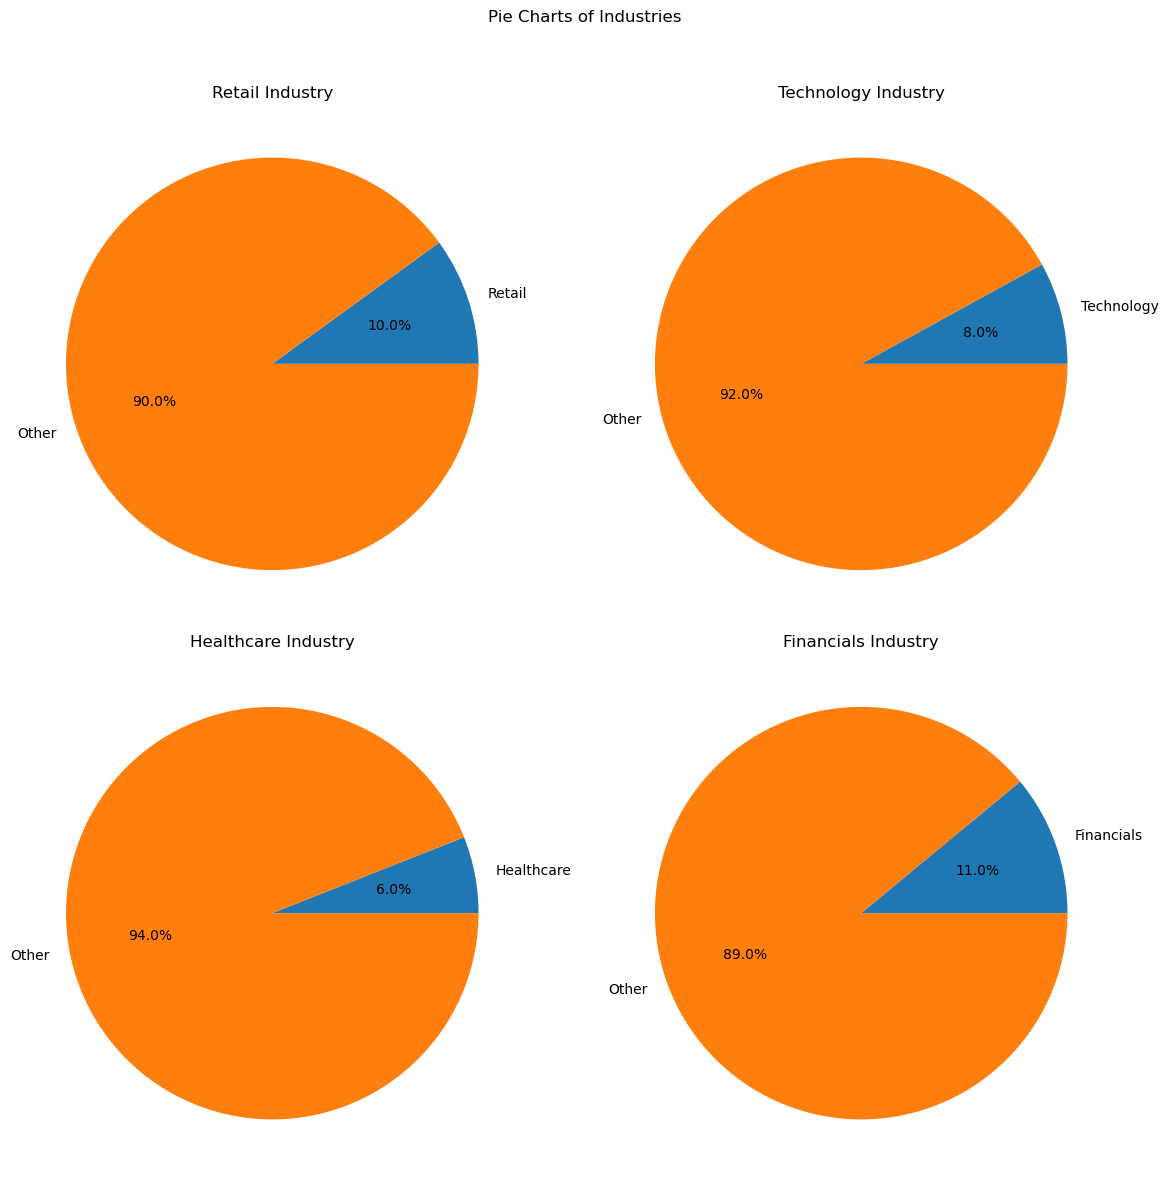

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
data = pd.read_csv('List_of_largest_companies_in_the_United_States_by_revenue_Data.csv')

# Define the industries you want to create pie charts for (customize as needed)
industries = ['Retail', 'Technology', 'Healthcare', 'Financials']

# Create subplots for the pie charts
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Pie Charts of Industries')

# Iterate through the selected industries and create pie charts
for i, industry in enumerate(industries):
    # Filter data for the current industry
    industry_data = data[data['Industry'] == industry]
    
    # Calculate the counts of companies in the current industry
    industry_counts = len(industry_data)
    
    # Plot the pie chart in the corresponding subplot
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.pie([industry_counts, len(data) - industry_counts], labels=[industry, 'Other'], autopct='%1.1f%%')
    ax.set_title(f'{industry} Industry')

# Adjust spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the pie charts
plt.show()


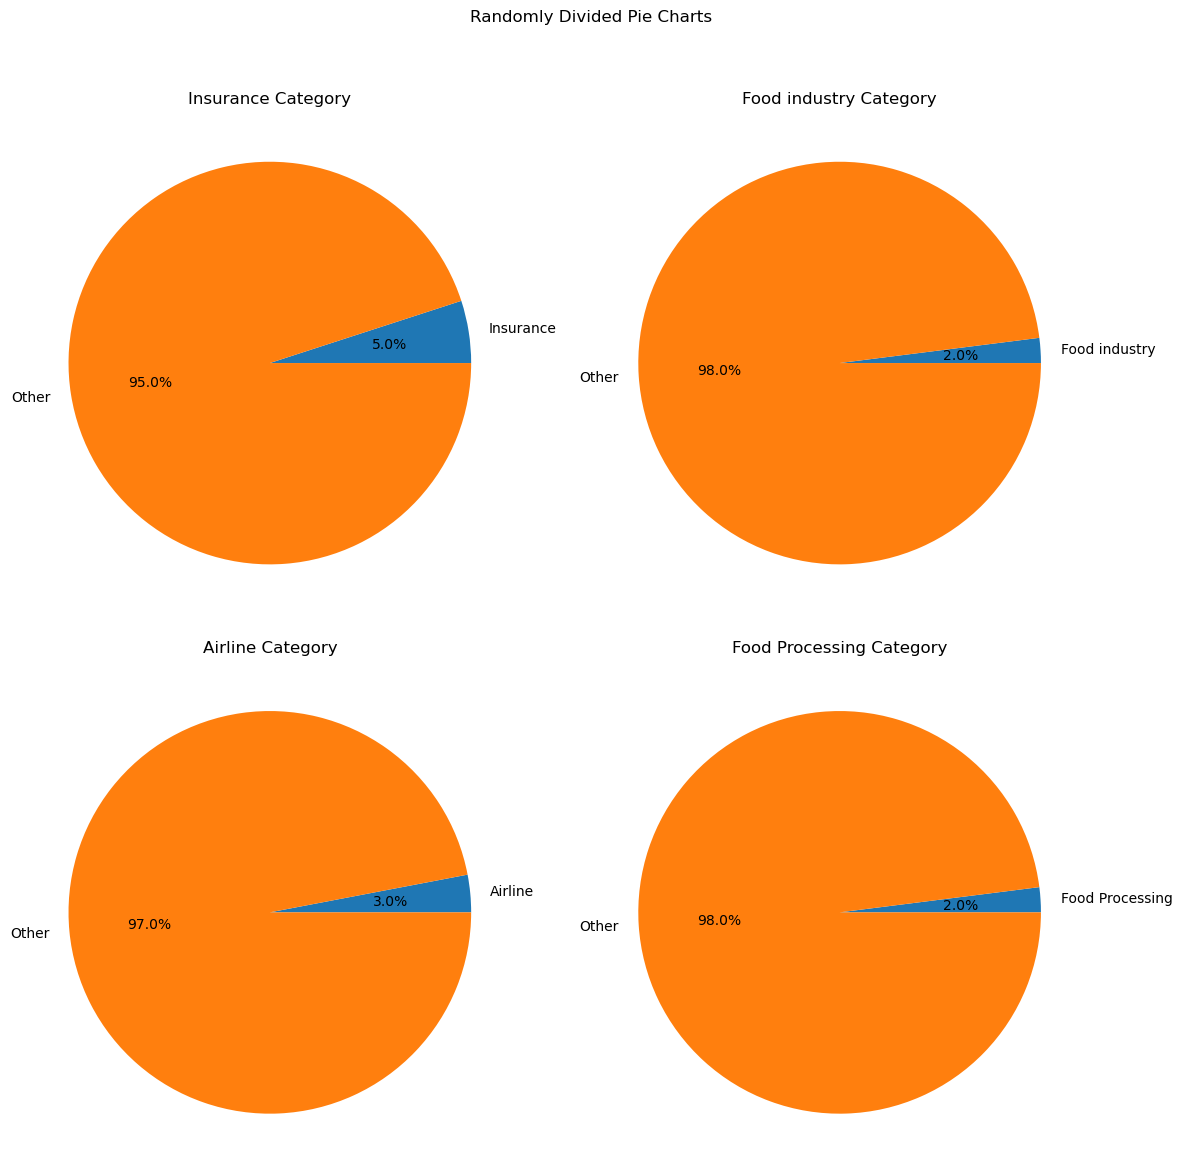

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import random

# Load your dataset
data = pd.read_csv('List_of_largest_companies_in_the_United_States_by_revenue_Data.csv')

# Get a list of unique industry categories
unique_categories = data['Industry'].unique()

# Define the four categories randomly (customize as needed)
categories = random.sample(list(unique_categories), 4)

# Create subplots for the pie charts
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Randomly Divided Pie Charts')

# Iterate through the selected categories and create pie charts
for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = data[data['Industry'] == category]
    
    # Calculate the counts of companies in the current category
    category_counts = len(category_data)
    
    # Plot the pie chart in the corresponding subplot
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.pie([category_counts, len(data) - category_counts], labels=[category, 'Other'], autopct='%1.1f%%')
    ax.set_title(f'{category} Category')

# Adjust spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the pie charts
plt.show()
